In [19]:
!pip install tika

  Created wheel for tika: filename=tika-1.24-cp37-none-any.whl size=32884 sha256=069256ecab7c2ecb8496bcb4cb962b34329f6be1400b08e5c6600a6c03e34f78
  Stored in directory: /Users/davidrollins/Library/Caches/pip/wheels/73/9c/f5/0b1b738442fc2a2862bef95b908b374f8e80215550fb2a8975
Successfully built tika


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import requests
from bs4 import BeautifulSoup
from collections import Counter
import io
import re
import math
from tika import parser
import random
from random import choices
import operator
from sklearn import linear_model

ModuleNotFoundError: No module named 'tika'

### Problem 1
Read Shannon’s 1948 paper ’A Mathematical Theory of Communication’.  Focus on pages 1-19 (upto Part II), the remaining part is more relevant for communication.

http://math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf

This paper explores the field of communication theory, and in particular, how noise in the channel affects communication and how to remedy this with meessage compression. Shannon explores three different systems for this problem: discrete, mixed, and continuous. 


Discrete systems are systems in which both the message and the signal are a sequence of discrete symbols.
Continous Systems are systems in which the message and signal are both treated as continuous functions.
And mixed systems are systems in which both discrete and continuous variables appear.


Shannon starts by explaining thee necessary components of a communication system and the process in which a message is sent and recieved. 


First, an information source produces a message to be communicated to the reciever. Next, the transmitter operates on the message to produce a signal to transmit over a channeel. The channel is the medium used to transmit the signal from transmitter to receiver. Then, the receiver performs the inverse operation of that done by the transmitter to reconstruct the message from the signal.



Then, Shannon lays out the theoretical solutions to compress messages with a noiseless example and then looks into examples with noise. 

In order to analyze message/signal transmission through a channel, Shannon introduced a way to measure how much information is in a message, also known as entropy.

One important discovery was that if the amount of information transmitted (the entropy rate) is more than a channel's capacity, then errors would occur during transmission. 
But if the entropy rate is less than a channel's capacity, there exists a way to encode the message without errors.

He does this by finding the length of a codeword then encoding a "prefix" with those lengths.



### Problem 2: 
#### Scraping, Entropy and ICML papers.ICML

The International Conference on Machine Learning – is a top research conference in Machinelearning.   

Scrape  all  the  pdfs  of  all  ICML  2020  papers  from http://proceedings.mlr.press/v119/

1. What are the top 10 common words in the ICML papers?

2.  Let Z be a randomly selected word in a randomly selected ICML paper.  Estimate the entropy of Z.

3.  Synthesize a random paragraph using the marginal distribution over words.

4.  (Optional)  Synthesize  a  random  paragraph  using  an  n-gram  model  on  words.   Synthesizea random paragraph using any model you want.  Top five synthesized text paragraphs winbonus!

In [165]:
url = "http://proceedings.mlr.press/v97/"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html5lib')
#print(soup.prettify()) -- too long

preamble = "http://proceedings.mlr.press/v97/"
papers = []


for elm in soup.find_all(attrs={"target":"_blank"}):  # soup() is equivalent to soup.find_all()
    href = elm["href"]
    
    if preamble in href and "supp.pdf" not in href:
        papers.append(href)
    
#print(papers)


words = []
for pdf in papers:  #[:10]: # remove [:10] in final version - takes a long time to execute
    content = parser.from_file(pdf)["content"]
    words += re.sub("[^\w]", " ", content).split()

    
    
count = {}
for word in words:
    if word.lower() not in count:
        count[word.lower()] = 1
    else:
        count[word.lower()] += 1
        

def find_highest(count):
    max_key = max(count.items(), key=operator.itemgetter(1))[0]
    count.pop(max_key, None)
    return max_key

top30_words = []
for i in range(0,30):
    top30_words.append(find_highest(count))
    


uninteresting_words = ['the',
 'and',
 'of',
 'a',
 'to',
 'in',
 'for',
 '0',
 'is',
 'we',
 '1',
 't',
 'on',
 'by',
 'as',
 's',
 'this',
 'are',
 'with',
 '2',
 'that',
 'be',
 'et',
 'from',
 'al',
 '3',
 'can',
  'an',
  'cn',
   'w',
    'it',
    'g','e','o','our','der','at','z','q','x','m','http','org','4','d','j','y','c','v','5','b','n','f','r','h','l']

top10_words = []
while(len(top10_words) < 10):
    
    word = find_highest(count)
    
    if word in uninteresting_words:
        continue
    else:
        top10_words.append(word)
    
print("Top 10 words:")
print(top10_words)

    

2021-03-09 12:29:20,675 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/abbati19a/abbati19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-abbati19a-abbati19a.pdf.
2021-03-09 12:29:21,846 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/abels19a/abels19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-abels19a-abels19a.pdf.
2021-03-09 12:29:24,006 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/abu-el-haija19a/abu-el-haija19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-abu-el-haija19a-abu-el-haija19a.pdf.
2021-03-09 12:29:24,773 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/acharya19a/acharya19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-acharya19a-acharya19a.pdf.
2021-03-09 12:29:25,734 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/acharya19b/acharya19b.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-acharya19b-ach

2021-03-09 12:30:07,511 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/balcan19a/balcan19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-balcan19a-balcan19a.pdf.
2021-03-09 12:30:08,306 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/balduzzi19a/balduzzi19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-balduzzi19a-balduzzi19a.pdf.
2021-03-09 12:30:08,926 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/balin19a/balin19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-balin19a-balin19a.pdf.
2021-03-09 12:30:09,566 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bansal19a/bansal19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-bansal19a-bansal19a.pdf.
2021-03-09 12:30:09,836 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bapst19a/bapst19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-bapst19a-bapst19a.pdf.
2021-03-09 12:3

2021-03-09 12:30:57,368 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bubeck19a/bubeck19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-bubeck19a-bubeck19a.pdf.
2021-03-09 12:30:57,928 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/buchnik19a/buchnik19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-buchnik19a-buchnik19a.pdf.
2021-03-09 12:30:59,607 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bunne19a/bunne19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-bunne19a-bunne19a.pdf.
2021-03-09 12:31:01,968 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/burt19a/burt19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-burt19a-burt19a.pdf.
2021-03-09 12:31:02,677 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/byrd19a/byrd19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-byrd19a-byrd19a.pdf.
2021-03-09 12:31:05,279 [MainTh

2021-03-09 12:31:51,280 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cinelli19a/cinelli19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-cinelli19a-cinelli19a.pdf.
2021-03-09 12:31:51,573 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/clarkson19a/clarkson19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-clarkson19a-clarkson19a.pdf.
2021-03-09 12:31:52,095 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/clemencon19a/clemencon19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-clemencon19a-clemencon19a.pdf.
2021-03-09 12:31:52,396 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cobbe19a/cobbe19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-cobbe19a-cobbe19a.pdf.
2021-03-09 12:31:55,574 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cohen19a/cohen19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-cohen19a-cohen19a.pdf.

2021-03-09 12:32:37,802 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/du19b/du19b.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-du19b-du19b.pdf.
2021-03-09 12:32:38,321 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/du19c/du19c.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-du19c-du19c.pdf.
2021-03-09 12:32:38,673 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/du19d/du19d.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-du19d-du19d.pdf.
2021-03-09 12:32:39,725 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/du19e/du19e.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-du19e-du19e.pdf.
2021-03-09 12:32:40,682 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/duetting19a/duetting19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-duetting19a-duetting19a.pdf.
2021-03-09 12:32:41,359 [MainThread  ] [INFO ]  Retrieving http://proce

2021-03-09 12:33:25,729 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19a/gao19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-gao19a-gao19a.pdf.
2021-03-09 12:33:26,079 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19b/gao19b.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-gao19b-gao19b.pdf.
2021-03-09 12:33:27,164 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19c/gao19c.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-gao19c-gao19c.pdf.
2021-03-09 12:33:27,611 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19d/gao19d.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-gao19d-gao19d.pdf.
2021-03-09 12:33:28,062 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19e/gao19e.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-gao19e-gao19e.pdf.
2021-03-09 12:33:28,863 [MainThread  ] [INFO ]  Retrieving http://proceedin

2021-03-09 12:34:03,346 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/guo19b/guo19b.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-guo19b-guo19b.pdf.
2021-03-09 12:34:04,159 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/guo19c/guo19c.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-guo19c-guo19c.pdf.
2021-03-09 12:34:04,682 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gural19a/gural19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-gural19a-gural19a.pdf.
2021-03-09 12:34:08,792 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/haber19a/haber19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-haber19a-haber19a.pdf.
2021-03-09 12:34:09,502 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hacohen19a/hacohen19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-hacohen19a-hacohen19a.pdf.
2021-03-09 12:34:10,145 [MainThread  ] [INF

2021-03-09 12:35:21,210 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hunt19a/hunt19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-hunt19a-hunt19a.pdf.
2021-03-09 12:35:22,384 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hwang19a/hwang19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-hwang19a-hwang19a.pdf.
2021-03-09 12:35:23,537 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ialongo19a/ialongo19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-ialongo19a-ialongo19a.pdf.
2021-03-09 12:35:25,226 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/innes19a/innes19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-innes19a-innes19a.pdf.
2021-03-09 12:35:25,767 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ipsen19a/ipsen19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-ipsen19a-ipsen19a.pdf.
2021-03-09 12:35:26,345 [MainTh

2021-03-09 12:36:29,766 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kenter19a/kenter19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-kenter19a-kenter19a.pdf.
2021-03-09 12:36:31,386 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/khadka19a/khadka19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-khadka19a-khadka19a.pdf.
2021-03-09 12:36:32,035 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/khasanova19a/khasanova19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-khasanova19a-khasanova19a.pdf.
2021-03-09 12:36:33,050 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kim19a/kim19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-kim19a-kim19a.pdf.
2021-03-09 12:36:36,415 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kim19b/kim19b.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-kim19b-kim19b.pdf.
2021-03-09 12:36:40,303 [Ma

2021-03-09 12:37:26,148 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lee19e/lee19e.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-lee19e-lee19e.pdf.
2021-03-09 12:37:26,418 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lee19f/lee19f.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-lee19f-lee19f.pdf.
2021-03-09 12:37:26,946 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lei19a/lei19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-lei19a-lei19a.pdf.
2021-03-09 12:37:27,424 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lerasle19a/lerasle19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-lerasle19a-lerasle19a.pdf.
2021-03-09 12:37:28,081 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lezcano-casado19a/lezcano-casado19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-lezcano-casado19a-lezcano-casado19a.pdf.
2021-03-09 12:3

2021-03-09 12:38:11,155 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/luise19a/luise19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-luise19a-luise19a.pdf.
2021-03-09 12:38:11,819 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/luo19a/luo19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-luo19a-luo19a.pdf.
2021-03-09 12:38:14,575 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ma19a/ma19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-ma19a-ma19a.pdf.
2021-03-09 12:38:14,982 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ma19b/ma19b.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-ma19b-ma19b.pdf.
2021-03-09 12:38:15,796 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ma19c/ma19c.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-ma19c-ma19c.pdf.
2021-03-09 12:38:19,062 [MainThread  ] [INFO ]  Retrieving http://proceedings.m

2021-03-09 12:39:21,572 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mohri19a/mohri19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-mohri19a-mohri19a.pdf.
2021-03-09 12:39:21,969 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mollenhoff19a/mollenhoff19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-mollenhoff19a-mollenhoff19a.pdf.
2021-03-09 12:39:22,638 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/moon19a/moon19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-moon19a-moon19a.pdf.
2021-03-09 12:39:23,521 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mostafa19a/mostafa19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-mostafa19a-mostafa19a.pdf.
2021-03-09 12:39:24,025 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/muehlebach19a/muehlebach19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-muehlebach19a-muehlebach

2021-03-09 12:40:01,089 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/park19a/park19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-park19a-park19a.pdf.
2021-03-09 12:40:04,334 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/park19b/park19b.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-park19b-park19b.pdf.
2021-03-09 12:40:04,896 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/park19c/park19c.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-park19c-park19c.pdf.
2021-03-09 12:40:05,323 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/pathak19a/pathak19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-pathak19a-pathak19a.pdf.
2021-03-09 12:40:07,236 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/paty19a/paty19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-paty19a-paty19a.pdf.
2021-03-09 12:40:08,039 [MainThread  ] [INFO ] 

2021-03-09 12:40:33,601 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rieck19a/rieck19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-rieck19a-rieck19a.pdf.
2021-03-09 12:40:33,896 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rolland19a/rolland19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-rolland19a-rolland19a.pdf.
2021-03-09 12:40:34,428 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/romoff19a/romoff19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-romoff19a-romoff19a.pdf.
2021-03-09 12:40:35,253 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rosenberg19a/rosenberg19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-rosenberg19a-rosenberg19a.pdf.
2021-03-09 12:40:35,581 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rossi19a/rossi19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-rossi19a-rossi19a.pdf.
2021-03

2021-03-09 12:41:36,294 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/so19a/so19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-so19a-so19a.pdf.
2021-03-09 12:41:36,620 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/son19a/son19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-son19a-son19a.pdf.
2021-03-09 12:41:37,172 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/song19a/song19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-song19a-song19a.pdf.
2021-03-09 12:41:38,216 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/song19b/song19b.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-song19b-song19b.pdf.
2021-03-09 12:41:38,600 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/song19c/song19c.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-song19c-song19c.pdf.
2021-03-09 12:41:39,443 [MainThread  ] [INFO ]  Retrieving http://p

2021-03-09 12:42:24,840 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tran19b/tran19b.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-tran19b-tran19b.pdf.
2021-03-09 12:42:25,960 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/trippe19a/trippe19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-trippe19a-trippe19a.pdf.
2021-03-09 12:42:26,798 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/trouleau19a/trouleau19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-trouleau19a-trouleau19a.pdf.
2021-03-09 12:42:27,421 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tsakiris19a/tsakiris19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-tsakiris19a-tsakiris19a.pdf.
2021-03-09 12:42:27,721 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/turner19a/turner19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-turner19a-turner19a.pdf.
2021-03

2021-03-09 12:43:05,915 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/weng19a/weng19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-weng19a-weng19a.pdf.
2021-03-09 12:43:06,121 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wenliang19a/wenliang19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-wenliang19a-wenliang19a.pdf.
2021-03-09 12:43:07,909 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/westphal19a/westphal19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-westphal19a-westphal19a.pdf.
2021-03-09 12:43:08,379 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/whitehill19a/whitehill19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-whitehill19a-whitehill19a.pdf.
2021-03-09 12:43:09,519 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wildner19a/wildner19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-wildner19a-wildner

2021-03-09 12:43:43,162 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yu19c/yu19c.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-yu19c-yu19c.pdf.
2021-03-09 12:43:44,431 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yu19d/yu19d.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-yu19d-yu19d.pdf.
2021-03-09 12:43:44,976 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yu19e/yu19e.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-yu19e-yu19e.pdf.
2021-03-09 12:43:45,839 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yu19f/yu19f.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-yu19f-yu19f.pdf.
2021-03-09 12:43:47,515 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yuan19a/yuan19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-yuan19a-yuan19a.pdf.
2021-03-09 12:43:48,988 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press

2021-03-09 12:44:35,687 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhou19e/zhou19e.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-zhou19e-zhou19e.pdf.
2021-03-09 12:44:36,434 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhu19a/zhu19a.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-zhu19a-zhu19a.pdf.
2021-03-09 12:44:38,778 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhu19b/zhu19b.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-zhu19b-zhu19b.pdf.
2021-03-09 12:44:39,065 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhu19c/zhu19c.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-zhu19c-zhu19c.pdf.
2021-03-09 12:44:39,859 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhu19d/zhu19d.pdf to /var/folders/c_/ns1rsjk10x1cszkmwzj6_9w40000gq/T/v97-zhu19d-zhu19d.pdf.
2021-03-09 12:44:42,181 [MainThread  ] [INFO ]  Retrieving http://proce

Top 10 words:
['model', 'which', '2018', 'data', '2017', 'where', 'algorithm', 'each', 'not', 'neural']


In [166]:
entropy = 0

rand_word = random.randint(0, len(words))
rand_paper = random.randint(0, len(papers))
total_words = sum(count.values())
for word, num_word in count.items():
    
    word_probability = num_word/total_words
    entropy += (-1)*word_probability*np.log2(word_probability)
    
    
    
print(entropy)

12.441054551885085


In [167]:
probabilities = []
choice_words = []
for word, num in count.items():
    choice_words.append(word)
    probabilities.append(num/total_words)
    
random_words = choices(choice_words, probabilities, k=40)
paragraph = ' '.join(random_words)
print(paragraph)

θd formulas dimensions duplication 2010 death twice could φpp hidden min numerical gan predictions ge those versarial propose 2011 sampling been prior latent dr 7 inc approach outperforms ideal number use q deep sample one pp carlo non lt adapt


### Problem 3: 

Logistic Regression.The following is a logistic regression problem using a real data set, made available by the authorsof the book “Applied Regression and Muiltilevel Modeling” by Gelman and Hill.

Download the data from the book, which you can find here http://www.stat.columbia.edu/~gelman/arm/software/.   In  particular,  we  are  interested  in  thearsenicdata  set.   The  file wells.dat contains  data  on  3,020  households  in  Bangladesh.   For  each  family,  the  natural  arsenic  level  of  each  well  was  measured.   In  addition,  the  distance  to  the  nearest  safest  well  wasmeasured.  Each family is also described by a feature that relates to their community involvement,and a feature that gives the education level of the head of household.  We are interested in buildinga model that predicts whether the family decided to switch wells or not, based on being informed of the level of arsenic in the well.  Thus the “label” for this problem is the binary vector that is thefirst column of the dataset, labeled “switch.”

•Fit a logistic regression model using only an offset term and the distance to the nearest safe well.

•Plot your answer:  that is, plot the probability of switching wells as a function of the distanceto the nearest safe well.

•Interpreting logistic regression coefficients: Use the “rule-of-4” discussed in class on Thursday, to interpret the solution:  what can you say about the change in the probability of switchingwells, for every additional 100 meters of distance?

•Now solve a logistic regression incorporating the constant term, the distance and also arsenic levels.  Report the coefficients

•Next we want to answer the question of which factor is more significant, distance, or arsenic levels?   This  is  not  a  well  specified  question,  since  these  two  features  have  different  units.One natural choice is to ask if after normalizing by the respective standard deviations of each feature, if moving one unit in one (normalized) feature predicts a larger change in probabilityof  switching  wells,  than  moving  one  unit  in  the  other  (also  normalized)  feature.   Use  thisreasoning to answer the question.

•Now consider all the features in the data set.  Also consider adding interaction terms amongall features that have a large main effect.  Use cross validation to build the best model youcan (using your training set only), and then report the test error of your best model.1

In [168]:
wells = pd.read_csv("./arsenic/wells.dat", sep=' ')
wells.head()

,switch,arsenic,dist,assoc,educ
1,1,2.36,16.826000,0,0
2,1,0.71,47.321999,0,0
3,0,2.07,20.966999,0,10
4,1,1.15,21.486000,0,12
5,1,1.10,40.874001,1,14


•Fit a logistic regression model using only an offset term and the distance to the nearest safe well.

•Plot your answer: that is, plot the probability of switching wells as a function of the distance to the nearest safe well.

•Interpreting logistic regression coefficients: Use the “rule-of-4” discussed in class on Thursday, to interpret the solution: what can you say about the change in the probability of switching wells, for every additional 100 meters of distance?


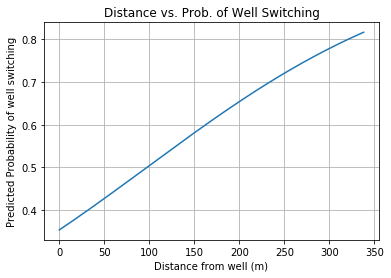

Model coefficients: [[ 0.30297742 -0.00621875]]
Rule of 4: 0.1554687802438503% increase in probability of switching wells for every meter of distance


In [169]:
bias = np.ones(wells.shape[0]).T
dist = wells.values[:, 2]
max_dist = int(max(dist))
#print(dist)
X = np.stack((bias, dist), axis=-1)
switch = wells.values[:, 0]

clf = sklearn.linear_model.LogisticRegression(C=1000000, solver="liblinear")
model = clf.fit(X, switch)
dist_arr = np.array([i for i in range(max_dist)])
dist_matrix = np.stack((np.ones(max_dist), dist_arr),axis=-1)

prob_pred = model.predict_proba(dist_matrix)

plt.plot(dist_arr, prob_pred[:, 0])
plt.xlabel("Distance from well (m)")
plt.ylabel("Predicted Probability of well switching")
plt.title("Distance vs. Prob. of Well Switching")
plt.grid()
plt.show()

print("Model coefficients: " + str(model.coef_))


print("Rule of 4: " + str(abs(model.coef_[0][1]/4) * 100) + "% increase in probability of switching wells for every meter of distance")

•Now solve a logistic regression incorporating the constant term, the distance and also arsenic levels. Report the coefficients

•Next we want to answer the question of which factor is more significant, distance, or arsenic levels? This is not a well specified question, since these two features have different units.One natural choice is to ask if after normalizing by the respective standard deviations of each feature, if moving one unit in one (normalized) feature predicts a larger change in probabilityof switching wells, than moving one unit in the other (also normalized) feature. Use thisreasoning to answer the question.

•Now consider all the features in the data set. Also consider adding interaction terms amongall features that have a large main effect. Use cross validation to build the best model youcan (using your training set only), and then report the test error of your best model.

[[ 0.16642635  0.51016231 -0.34495391]]
From the coefficients, we can see that arsenic levels impact the probability of switching wells with magnitude 0.51 as opposed to distance that impacts with magnitude -0.345
Thus, it follows that arsenic levels more significantly contribute to the probability of well-switching 


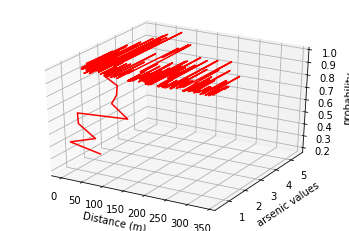

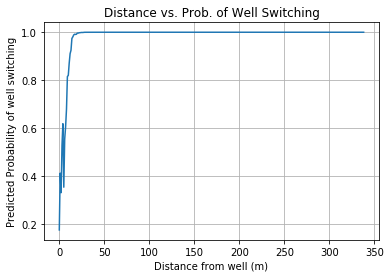

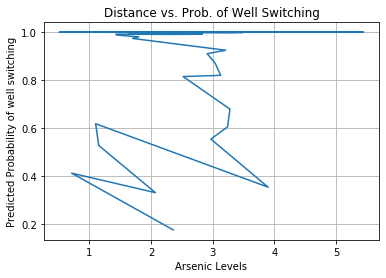

In [170]:
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

arsenic_and_distance = np.stack((wells.values[:,1], dist), axis=-1)
#print(arsenic_and_distance)
mean = np.mean(arsenic_and_distance, axis=0)
std = np.std(arsenic_and_distance, axis=0)
normalized_ad = ((arsenic_and_distance)-mean)/std

regression_X = np.column_stack((np.ones(wells.shape[0]).T, normalized_ad))

clf2 = sklearn.linear_model.LogisticRegression(C=1000000, solver="liblinear")
model2 = clf2.fit(regression_X, switch)
print(fitted_model2.coef_)


print("From the coefficients, we can see that arsenic levels impact the probability of switching wells with magnitude 0.51 as opposed to distance that impacts with magnitude -0.345")
print("Thus, it follows that arsenic levels more significantly contribute to the probability of well-switching ")




###############################################################
dist_arr = np.array([i for i in range(max_dist)])
arsenic_arr = np.array([wells.values[i, 1] for i in range(max_dist)])
dist_matrix = np.stack((np.ones(max_dist), arsenic_arr, dist_arr),axis=-1)


prob_pred = model2.predict_proba(dist_matrix)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Distance (m)")
ax.set_ylabel("arsenic values")
ax.set_zlabel("probability")
ax.plot3D(dist_arr, arsenic_arr, prob_pred[:, 0], 'red')
plt.show()
###############################################################

# Comment out before final submission? I just wanted to try it.. Not sure the plot perfectly reflects probability of well-switching



plt.plot(dist_arr, prob_pred[:, 0])
plt.xlabel("Distance from well (m)")
plt.ylabel("Predicted Probability of well switching")
plt.title("Distance vs. Prob. of Well Switching")
plt.grid()
plt.show()

plt.plot(arsenic_arr, prob_pred[:, 0])
plt.xlabel("Arsenic Levels")
plt.ylabel("Predicted Probability of well switching")
plt.title("Distance vs. Prob. of Well Switching")
plt.grid()
plt.show()


In [171]:
all_features = wells.values[:, 4]
normalized_af = (all_features - np.mean(all_features, axis=0))/np.std(all_features, axis=0)
all_cols = [regression_X, np.array(wells.values[:, 3]).T, normalized_af]
regression_X2 = np.column_stack(all_cols)

Cs = [10000000, 1000000, 100000, 10000, 1000, 100, 10, 1]

rand_cv = random.randint(10,int(regression_X2.shape[0]/30))
print("CV value: " + str(rand_cv))
clfCV = sklearn.linear_model.LogisticRegressionCV(Cs=Cs, cv=rand_cv).fit(regression_X2, switch)

print("Cross Validation Score = " + str(clfCV.score(regression_X2, switch)))

CV value: 15
Cross Validation Score = 0.6165562913907284


### Problem 4: 

Logistic Regression and CIFAR-10. In this problem you will explore the data set CIFAR-10, and you will use multinomial (multi-label) Logistic Regression to try to classify it. You will also explore visualizing the solution.

In [143]:
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [3]:
# Use the fetch openml command from sklearn.datasets to import the CIFAR-10-Small data set.
cifar = ds.fetch_openml('CIFAR_10_small')

In [4]:
cifar.data.shape

(20000, 3072)

In [5]:
cifar

{'data':           a0     a1     a2     a3     a4     a5     a6     a7     a8     a9  \
 0       59.0   43.0   50.0   68.0   98.0  119.0  139.0  145.0  149.0  149.0   
 1      154.0  126.0  105.0  102.0  125.0  155.0  172.0  180.0  142.0  111.0   
 2      255.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0  253.0   
 3       28.0   37.0   38.0   42.0   44.0   40.0   40.0   24.0   32.0   43.0   
 4      170.0  168.0  177.0  183.0  181.0  177.0  181.0  184.0  189.0  189.0   
 ...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
 19995   76.0   76.0   77.0   76.0   75.0   76.0   76.0   76.0   76.0   78.0   
 19996   81.0   91.0   98.0  106.0  108.0  110.0   80.0   84.0   88.0   90.0   
 19997   20.0   19.0   15.0   15.0   14.0   13.0   12.0   11.0   10.0    9.0   
 19998   25.0   15.0   23.0   17.0   23.0   51.0   74.0   91.0  114.0  137.0   
 19999   73.0   98.0   99.0   77.0   59.0  146.0  214.0  176.0  125.0  218.0   
 
        ...  a3062  a3063  a30

In [98]:
df = pd.DataFrame(data=np.c_[cifar['data'], cifar['target']], columns=cifar['feature_names'] + ['target'])

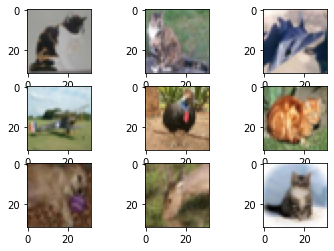

In [142]:
# Figure out how to display some of the images in this data set, and display a couple. 
# While not high resolution, these should be recognizable if you are doing it correctly.

# Generate 3d img array from dataset
def create_img_array(df):
    img_array = np.zeros((32,32,3))
    for i in range(32):
        for k in range(32):
            img_array[i][k][0] = int(img[i*32 + k])
            img_array[i][k][1] = int(img[i*32 + k + 1024])
            img_array[i][k][2] = int(img[i*32 + k + 2048])
    return img_array
    
# Plot 9 random images
fig, ax = plt.subplots(nrows=3, ncols=3)

for row in ax:
    for col in row:
        index = np.random.randint(2000, size=1)
        img = df.loc[index[0]][:-1]
        col.imshow(create_img_array(img).astype(np.uint8))
    

In [147]:
X_train, X_test, y_train, y_test = train_test_split(cifar.data, cifar.target, test_size = 0.25)
model = LogisticRegression(multi_class='multinomial', solver='saga')
clf = model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [166]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


y_pred = clf.predict(X_test)

score = accuracy_score(y_test, y_pred)
# print('Test Accuracy Score', score)

score = cross_val_score(clf, X_test, y_test, cv=5)
print('CV Score', score)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


CV Score [0.346 0.348 0.363 0.345 0.339]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [168]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.35 accuracy with a standard deviation of 0.01


In [170]:
# cross validate to find as good regularization coefficients as you can, 
# for l1 and l2 regularization (called penalties), which are naturally supported 
# in sklearn.linear model.LogisticRegression. I recommend you use the solver saga.

from sklearn.linear_model import LogisticRegressionCV

clf_l1 = LogisticRegressionCV(penalty='l1', tol=0.1, solver='saga')
clf_l1.fit(X_train, y_train)

LogisticRegressionCV(penalty='l1', solver='saga', tol=0.1)

In [171]:
clf_l2 = LogisticRegressionCV(penalty='l2', tol=0.1, solver='saga')
clf_l2.fit(X_train, y_train)


LogisticRegressionCV(solver='saga', tol=0.1)

In [179]:
coef_l1 = clf_l1.coef_.ravel()
coef_l2 = clf_l2.coef_.ravel()

print("Score with L1 penalty:", clf_l1.score(X_test, y_test))
print("Score with L2 penalty:", clf_l2.score(X_test, y_test))

Score with L1 penalty: 0.3738
Score with L2 penalty: 0.3842
